In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import pathlib

data_dir = pathlib.Path("DATA") # indiquer chemin  où sont les données

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg'))) # compte le nb d'images dans le dossier
image_count

55

In [4]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]) 
CLASS_NAMES # liste des noms de dossiers

array(['D46D', 'F35'], dtype='<U4')

In [5]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # 
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [6]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
#On importe les images

Found 55 images belonging to 2 classes.


In [7]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
#Fonction d'affichage des images

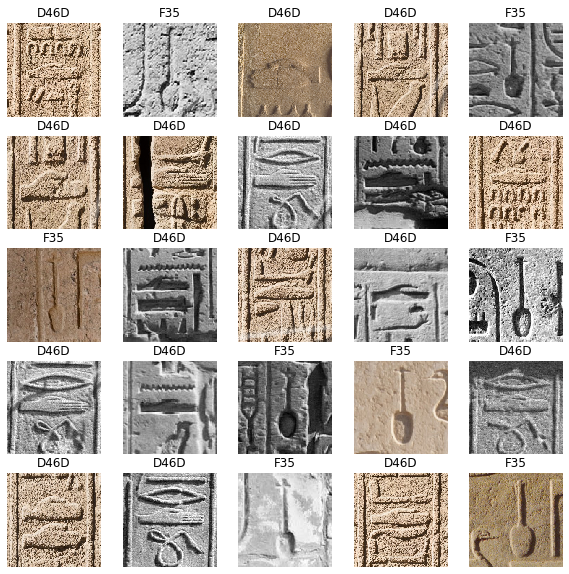

In [8]:
image_batch, label_batch = next(train_data_gen) #Pour séparer le label de l'image
show_batch(image_batch, label_batch)

In [9]:
label = []
for item in label_batch:
    label.append(np.argmax(item))
label = np.array(label)

In [10]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(image_batch, label, test_size=0.25)

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
type(testY)

numpy.ndarray

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trainX, trainY, epochs=10, 
                    validation_data=(testX, testY))

Train on 24 samples, validate on 8 samples
Epoch 1/10
24/24 [==============================] - 3s 106ms/sample - loss: 2.3019 - accuracy: 0.0833 - val_loss: 1.4260e-05 - val_accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 1s 47ms/sample - loss: 5.3283 - accuracy: 0.5833 - val_loss: 6.3014 - val_accuracy: 0.0000e+00
Epoch 3/10
24/24 [==============================] - 1s 42ms/sample - loss: 3.2833 - accuracy: 0.4167 - val_loss: 1.0790 - val_accuracy: 0.0000e+00
Epoch 4/10
24/24 [==============================] - 1s 41ms/sample - loss: 0.7062 - accuracy: 0.4583 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 1s 43ms/sample - loss: 1.7861 - accuracy: 0.5833 - val_loss: 0.1520 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 44ms/sample - loss: 0.8185 - accuracy: 0.5833 - val_loss: 0.7958 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 45ms/sample - loss: 0.7299 - ac

8/1 - 0s - loss: 0.2090 - accuracy: 1.0000


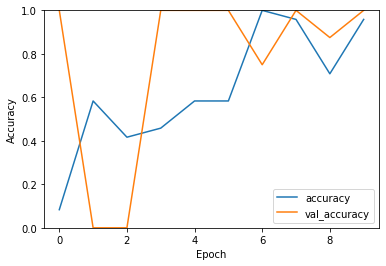

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

In [15]:
print(test_acc)

1.0
